# **Aircraft Safety Risk Analysis**

## 1.Business Understanding

- The company is venturing into new industries as part of its strategy to broaden and diversify their portfolio. The **problem** at hand is that they lack knowledge about the potential risks of aircraft, particularly in the context of purchasing and operating airplanes for commercial and private enterprises. Understanding these risks is crucial for making informed decisions and implementing appropriate safety measures.
- The impact of the problem is significant, as it could lead to uninformed decision-making, increased vulnerability to potential risks, and compromised safety standards for aircraft operations. This lack of understanding could also result in financial losses, regulatory non-compliance, and potentially unsafe conditions for passengers and crew.
- The scope of this project includes conducting an in-depth analysis of various aircraft models in the market, comparing their technical specifications, performance metrics, and cost implications. The analysis will also involve evaluating the suitability of different aircraft for specific operational requirements and routes.
- The goal is to assess the safety of different aircraft types and recommend safer models for the business to focus on.
- My project will be successful if: 
  1. I identify Aircraft with the least and most accidents so as to  choose aircraft models with proven safety records. 
  2. I identify Aircraft with the most fatal injuries and accident rates 
  3. I identify a seasonal trend of accident rates.

## 2. Data Understanding

In [75]:
# Importing the libraries needed
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Importing the dataset and creating a dataframe to store it in
df = pd.read_csv("AviationData.csv", encoding='latin-1')

c:\Users\Wanjiru\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [77]:
# Viewing the first 5 rows of the dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [78]:
#Getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [79]:
# Viewing the columns in the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [80]:
# Viewing the number of rows and columns respectively 
df.shape

(88889, 31)

In [81]:
# Getting the summary statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [82]:
# Keeping the original dataset to make sure i have the original even after I make changes to the dataset.
df1 = df.copy()

## 3. Data Preparation

- In this part I am going to conduct Exploratory Data Analysis and data cleaning to be able to gain clear insights from the dataset.

In [83]:
# Checking for null values in each column
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [84]:
# Dropping columns I won't need for my analysis and with too many null values
Drop_Col= ['Latitude', 'Longitude' , 'Air.carrier','Schedule', 'Broad.phase.of.flight', 
           'Airport.Code', 'Aircraft.Category', 'Registration.Number','Airport.Name']
df_clean=df1.drop(columns=Drop_Col)


In [85]:
df_clean.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,...,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996


 **Observation**: There are 22 columns remaining after dropping some columns

My first metric of success is selecting  aircraft models with the lowest historical accident and incident rates, aiming for a low-accident track record.

In [86]:
df_clean.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6381
Publication.Date          13771
dtype: int64

In [87]:
#Filling the columns that contain null values with the word "Unknown". Since dropping the null values will drastically reduce the dataset.
df_clean['Number.of.Engines'].fillna('Unkown',inplace=True)
df_clean['Engine.Type'].fillna('Unknown',inplace=True)
df_clean['Purpose.of.flight'].fillna('Unknown',inplace=True)
df_clean['Aircraft.damage'].fillna('Unknown',inplace=True)
df_clean['Total.Uninjured'].fillna(0, inplace=True)

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       88889 non-null  object 
 12  Engine.Type             88889 non-null  object 
 13  FAR.Description         32023 non-null  object 
 14  Purpose.of.flight       88889 non-null

In [89]:
# Converting the injury columns to numeric then  replacing missing values with 0 for injury counts
df_clean['Total.Fatal.Injuries'] = pd.to_numeric(df_clean['Total.Fatal.Injuries'], errors='coerce').fillna(0)
df_clean['Total.Serious.Injuries'] = pd.to_numeric(df_clean['Total.Serious.Injuries'], errors='coerce').fillna(0)
df_clean['Total.Minor.Injuries'] = pd.to_numeric(df_clean['Total.Minor.Injuries'], errors='coerce').fillna(0)

# Convert date columns to datetime format
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')
# Drop rows where 'Make' or 'Model' are missing
aviation_data_cleaned = df_clean.dropna(subset=['Make', 'Model'])


### A. Accident Frequency per Aircraft Type

In [90]:
aviation_data_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [91]:
# Group by aircraft type and calculate the count of accidents and total fatalities
aircraft_accident_stats = aviation_data_cleaned.groupby('Make').agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': 'sum'
}).reset_index()

# Rename columns for clarity
aircraft_accident_stats.columns = ['Aircraft Type', 'Accident Count', 'Total Fatalities']

# Sorting by accident count
aircraft_accident_stats = aircraft_accident_stats.sort_values(by='Accident Count', ascending=False)

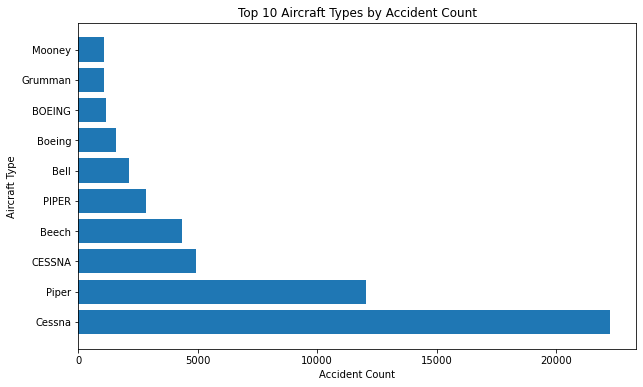

In [92]:
# Plotting the top 10 Aircraft type by Accident count
plt.figure(figsize=(10,6))
plt.barh(aircraft_accident_stats['Aircraft Type'][:10], aircraft_accident_stats['Accident Count'][:10])
plt.xlabel('Accident Count')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Types by Accident Count')
plt.show()

**Observation:** CESSNA and Piper have the highest accident count

In [93]:
# Grouping the data by aircraft make and model, and calculate total fatalities and accident count
aircraft_risk_summary = aviation_data_cleaned.groupby(['Make', 'Model']).agg(
    total_fatalities=pd.NamedAgg(column='Total.Fatal.Injuries', aggfunc='sum'),
    total_serious_injuries=pd.NamedAgg(column='Total.Serious.Injuries', aggfunc='sum'),
    total_minor_injuries=pd.NamedAgg(column='Total.Minor.Injuries', aggfunc='sum'),
    accident_count=pd.NamedAgg(column='Make', aggfunc='size')  # Count of accidents per aircraft type
).reset_index()


# Sorting by total fatalities and accident count to highlight high-risk aircraft
aircraft_risk_summary_sorted = aircraft_risk_summary.sort_values(by=['total_fatalities', 'accident_count'], ascending=False)

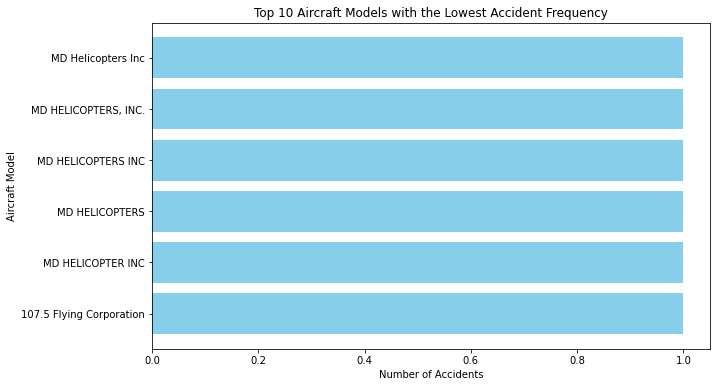

In [94]:
# Sorting aircraft by accident count to find the models with the least number of accidents
low_accident_aircraft = aircraft_risk_summary.sort_values(by='accident_count', ascending=True).head(10)

# Plotting the top 10 aircraft with the lowest accident frequency
plt.figure(figsize=(10, 6))
plt.barh(low_accident_aircraft['Make'], low_accident_aircraft['accident_count'], color='skyblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Aircraft Models with the Lowest Accident Frequency')
plt.show()

**Observation:**  MD Helicopters have the lowest accident count.

### B.Fatality Rate per Aircraft

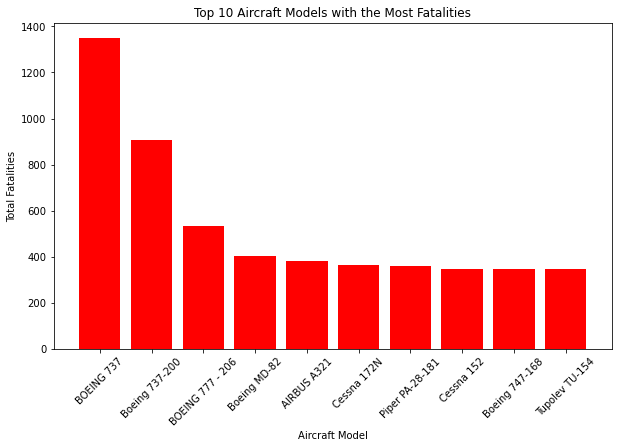

In [95]:
# Plotting the top 10 aircraft with the most fatalities
top_10_fatalities = aircraft_risk_summary_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_fatalities['Make'] +" " + top_10_fatalities['Model'], top_10_fatalities['total_fatalities'], color='red')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Fatalities')
plt.title('Top 10 Aircraft Models with the Most Fatalities')
plt.xticks(rotation=45)
plt.show()

**Observation:** Boeing 737 and Boeing 777 have the highest count in total fatalities.

In [96]:
# Combine the 'aircraft_manufacturer' (make) and 'aircraft_model' into a single column
aircraft_risk_summary['make_model'] = aircraft_risk_summary['Make'] + ' ' + aircraft_risk_summary['Model']

aircraft_risk_summary[['make_model']].head()

,make_model
0,107.5 Flying Corporation One Design DR 107
1,1200 G103
2,177MF LLC PITTS MODEL 12
3,1977 Colfer-chan STEEN SKYBOLT
4,1st Ftr Gp FOCKE-WULF 190


In [97]:
# Create a new column to classify fatal vs non-fatal accidents
aircraft_risk_summary['fatal'] = aircraft_risk_summary['total_fatalities'] > 0

# Group by aircraft type and count fatal and non-fatal accidents
fatal_vs_nonfatal = aircraft_risk_summary.groupby(['make_model','fatal']).size().unstack(fill_value=0)

# Display the top 10 aircraft types by accident count (both fatal and non-fatal)
fatal_vs_nonfatal_top10 = fatal_vs_nonfatal.loc[fatal_vs_nonfatal.sum(axis=1).sort_values(ascending=False).index[:10]]

print(fatal_vs_nonfatal_top10)

fatal                  False  True 
make_model                         
Wsk Pzl Mielec M-18A       1      1
Cessna Ector 305A          1      1
Brault Glasair SH2F        1      1
Piper Aerostar 602P        1      1
Boeing Stearman PT-17      0      2
Smith Aerostar 601P        1      1
Condor III                 1      0
Collette GLASSAIR III      1      0
Coen BENSON B8             0      1
Cohen VAN'S RV-6           1      0


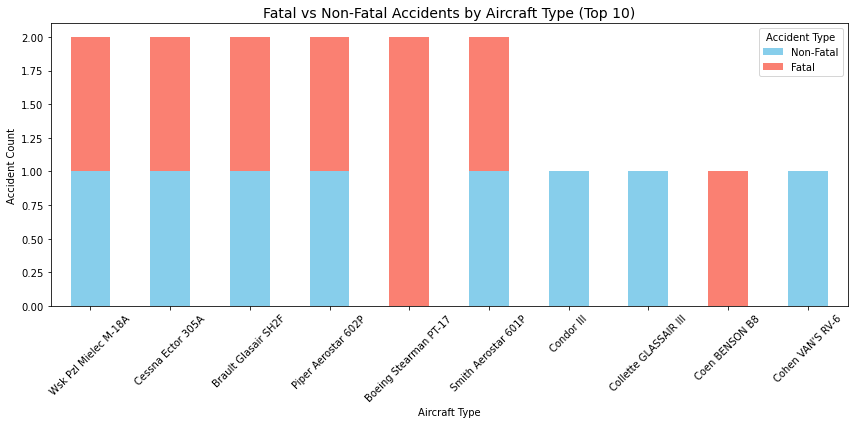

In [98]:
# Plot a stacked bar chart for the top 10 aircraft types
fatal_vs_nonfatal_top10.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])

# Add chart title and labels
plt.title('Fatal vs Non-Fatal Accidents by Aircraft Type (Top 10)', fontsize=14)
plt.xlabel('Aircraft Type')
plt.ylabel('Accident Count')
plt.legend(['Non-Fatal', 'Fatal'], title='Accident Type', loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** Some aircraft types exhibit a significantly higher proportion of fatal accidents compared to non-fatal ones. For example, Boeing Stearman PT-17 is colored in salmon representing fatal accidents, indicating a higher risk . These aircraft types are likely less safe and pose greater risks for the business.
On the other hand, there are aircraft types where the skyblue portion (non-fatal accidents) dominates the bar,for example Condor III, indicating that although these aircraft types may be involved in accidents, the accidents are generally non-fatal. These types are comparatively safer and may be a better choice for purchase.

### C. Time-Based Trend of Accidents

In [99]:
# Extracting the year from event_date and Grouping by year to calculate accident counts
aviation_data_cleaned['year'] = aviation_data_cleaned['Event.Date'].dt.year

accidents_by_year = aviation_data_cleaned.groupby('year').size()


<ipython-input-99-33839cf87fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_cleaned['year'] = aviation_data_cleaned['Event.Date'].dt.year


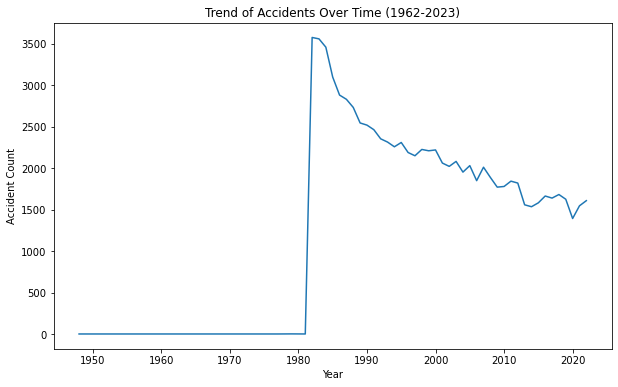

In [100]:
#Plotting a trend of accidents over time from 1962 to 2023
plt.figure(figsize=(10,6))
plt.plot(accidents_by_year.index, accidents_by_year.values)
plt.title('Trend of Accidents Over Time (1962-2023)')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.show()

**Observation:** While accidents have been trending downward over the years since 1980 due to technological advancements, certain periods show spikes in accidents. This indicates a need to monitor technology improvements and focus on aircraft that have seen improvements in recent years.

<ipython-input-101-d9c962926646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_cleaned['month'] = aviation_data_cleaned['Event.Date'].dt.month


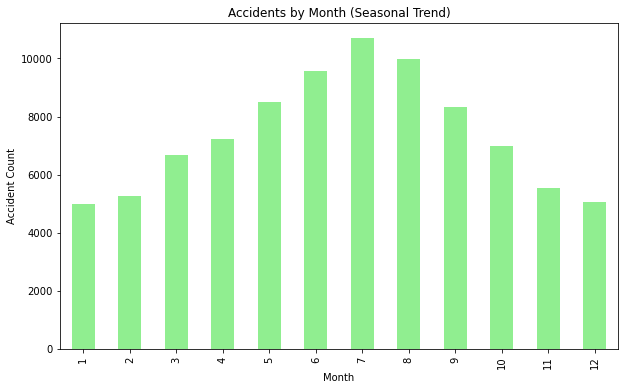

In [101]:
# Extract month from the event date
aviation_data_cleaned['month'] = aviation_data_cleaned['Event.Date'].dt.month

# Count accidents by month
accidents_by_month = aviation_data_cleaned['month'].value_counts().sort_index()

# Plot accidents by month (bar chart)
plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

**Observation:** Accidents may follow a seasonal trend, with more accidents occurring during certain months due to weather conditions or peak travel periods. This should call for planning of high maintanance of the aircraft during such seasons like the month of July.

## 4.Business Recommendations 

1. The top aircraft types with the highest accident counts should be avoided. For instance, BOEING 737 and Boeing Stearman PT-17, which show the highest accident and fatality rates, are higher-risk options.Prioritize aircraft from manufacturers with a strong safety record.
2.  Focus on aircraft types that show minimal or zero fatalities. Aircraft types such as MD Helicopters,have a low frequency of accidents, and  they rarely lead to fatal outcomes, making them safer choices.
3. Implement additional safety checks, maintenance, or training during months with historically higher accident rates such as the months of June, July and August. This proactive approach could reduce operational risks tied to weather or peak travel periods.

### 5. Conclusion.

By meeting these metrics, the project will have successfully supported the company's goal of entering the aviation sector while minimizing risks and ensuring informed decision-making.